In [1]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords


In [2]:
# Load dataset
# Replace 'spam.csv' with the path to your dataset
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']


In [3]:
# Data preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /home/crazy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Clean and preprocess the text data
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(words)


In [5]:
df['message'] = df['message'].apply(preprocess_text)


In [6]:
# Convert labels to binary format (spam = 1, ham = 0)
df['label'] = df['label'].map({'spam': 1, 'ham': 0})


In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)


In [8]:
# Convert text data to numerical format using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [9]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test_vec)


In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'])

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Accuracy: 0.9838565022421525

Classification Report:
               precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       965
        Spam       0.97      0.91      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



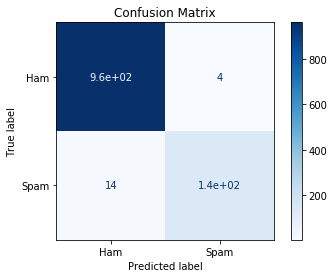

In [12]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Ham', 'Spam'])
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.title("Confusion Matrix")
plt.show()
